# Create network with preferential attachment

Reference: Barabasi-Albert model

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
def create_AB_edge_list(n_nodes):
    edge_list = {0:[0,1]} # link 0 between nodes 0 and 1
    for i in range(2,n_nodes): 
        edge_num = i-1 # number of edges in the graph
        src = i # id of the source node
        if i==2:
            edge = 0
        else:
            edge = np.random.choice(np.arange(edge_num-1))
        trg = np.random.choice(edge_list[edge])
        edge_list[edge_num] = [trg,src]
        
    edges = []
    for i in range(len(edge_list)):
        edges.append(tuple(edge_list[i]))
        
    return edges

In [4]:
edge_list = create_AB_edge_list(1000)
np.save("edges", edge_list)

In [5]:
G = nx.Graph(edge_list)

/home/nicola/.local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


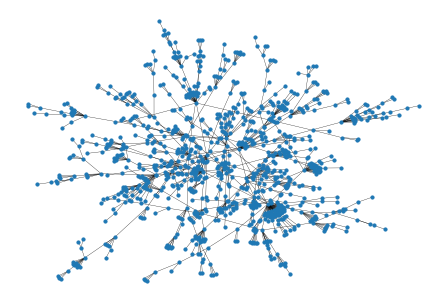

In [6]:
nx.draw(G, node_size = 10, width = 0.3)

In [79]:
k2 = np.array(list(dict(G.degree).values()))

In [80]:
bins = np.logspace(np.log10(k2.min()-0.5), np.log10(k2.max()+0.5), 12)
bins

array([  0.5       ,   0.83479467,   1.3937643 ,   2.32701402,
         3.88515783,   6.48661813,  10.82998854,  18.08163351,
        30.18890272,  50.40307042,  84.15242952, 140.5       ])

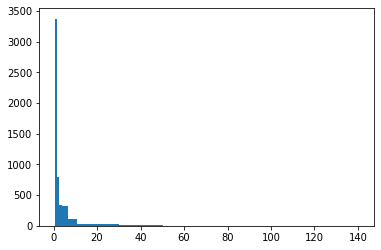

In [81]:
freq, _, _ = plt.hist(k2, bins=bins) # <- poisson discreto

In [82]:
width = bins[1:] - bins[:-1]
centers = (bins[1:] + bins[:-1])/2
weights = freq/width
sigma_weights = np.sqrt(freq)/width

In [83]:
area = np.sum(weights*width)
weights = weights/area
sigma_weights = sigma_weights/area

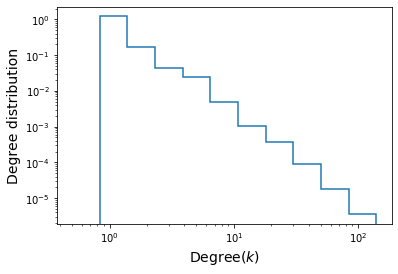

In [85]:
plt.hist(centers, bins=bins, weights=weights, linewidth = 1.5, histtype="step")
plt.xlabel("Degree($k$)", fontsize=14)
plt.ylabel("Degree distribution", fontsize=14)
plt.xscale("log")
plt.yscale("log")
plt.show()

In [91]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [92]:
indexes = [1,2,3]
a[indexes] = 0
a

array([0, 0, 0, 0, 4, 5, 6, 7, 8, 9])

In [93]:
np.sum(a)

39

In [94]:
a.sum()

39

In [87]:
mask = (a > 4)
mask

array([False, False, False, False, False,  True,  True,  True,  True,
        True])

In [89]:
a[mask] = a[mask]*2

In [90]:
a

array([ 0,  1,  2,  3,  4, 10, 12, 14, 16, 18])